In [ ]:
!pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade pandas 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 86.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.4
    Uninstalling pandas-1.4.4:
      Successfully uninstalled pandas-1.4.4


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns
import os
import pandas as pd
from tensorflow import keras
from google.colab import files
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from keras.layers import CuDNNLSTM
from keras.models import Sequential
plt.rcParams['figure.figsize'] = [16,8]
plt.rcParams.update({'font.size': 18})
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [3]:
# Load data set
from google.colab import drive
drive.mount('/content/drive/')
!ls /content/drive

Mounted at /content/drive/
MyDrive


In [4]:
# Read daily data set
dataframe = pd.ExcelFile('/content/drive/MyDrive/OnChainvs_Price_proj712.xlsx')
daily = pd.read_excel(dataframe, 'Daily Data', usecols="A:K")
daily = daily.rename(columns={'Unnamed: 0': 'Date'})
daily.sort_values('Date')
daily.head()
#daily.shape

,Date,Bitcoin Price,bitcoin-reserve-risk,bitcoin-realized-profit-usd,bitcoin-realized-loss-usd,bitcoin-total-supply-last-activ-24h,bitcoin-total-supply-last-activ-1d-1w,bitcoin-issuance-btc,bitcoin-wrapped-btc-wbtc-balanc,daysTillHalving,bitcoin-stock-to-flow-ratio-usd
0,2020-01-01T00:00:00Z,7199.661101,0.001793,9.061235e+06,1.611953e+07,79650.894873,537994.946203,2175.0,589.461971,132,8201.932535
1,2020-01-02T00:00:00Z,6985.659023,0.001763,2.850057e+07,4.430710e+07,155086.694678,473260.834515,1762.5,589.461971,131,8192.734785
2,2020-01-03T00:00:00Z,7347.597378,0.001794,4.000605e+07,3.201497e+07,229234.713800,404708.291646,2112.5,594.461971,130,8200.643821
3,2020-01-04T00:00:00Z,7415.202445,0.001821,2.042686e+07,3.873484e+07,114102.789783,528695.665082,2100.0,594.461971,129,8196.930748
4,2020-01-05T00:00:00Z,7410.812541,0.001849,2.169290e+07,1.399913e+07,92918.415125,532005.913111,2037.5,594.461971,128,8190.665125


In [5]:
# Read hourly data set
hourly = pd.read_excel(dataframe, 'Hourly Data')
hourly.sort_values('timestamp')
hourly.head()
# hourly.shape

,timestamp,BTC PRICE- USD,Bitcoin Number of Active Adrdresses,bitcoin-median-transfer-volume-,bitcoin-number-of-transactions,bitcoin-circulating-supply-btc,bitcoin-total-block-size,bitcoin-total-miner transaction-fees-
0,2020-01-01T00:00:00Z,7180.453680,31702.0,0.015804,12732.0,18133762.5,3147910,0.483139
1,2020-01-01T01:00:00Z,7204.251930,27746.0,0.018003,8452.0,18133800.0,5205848,0.383350
2,2020-01-01T02:00:00Z,7231.074650,33691.0,0.011310,10861.0,18133875.0,3457249,0.476334
3,2020-01-01T03:00:00Z,7217.565972,22939.0,0.009719,9209.0,18133937.5,4886205,0.433955
4,2020-01-01T04:00:00Z,7216.338894,21591.0,0.011864,6056.0,18133975.0,3957013,0.233571


Text(0, 0.5, 'Bitcoin Price (USD)')

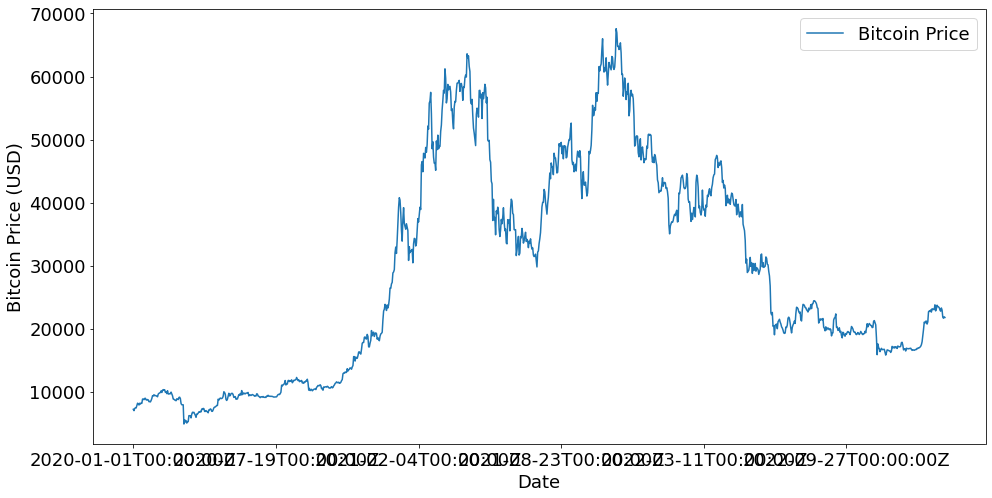

In [6]:
# Plot Daily Bitcoin Price 
btc_price = daily.plot(x='Date',y='Bitcoin Price')
btc_price.set_xlabel('Date')
btc_price.set_ylabel('Bitcoin Price (USD)')

# EDA for manipulations

Max 20 price increases in USD
[3403.68757611 3433.15180058 3441.35667108 3506.9873064  3688.24370711
 3780.3401366  3838.98952128 3844.72136706 3871.66495779 4090.46819539
 4126.61337622 4216.61608249 4216.7740419  4336.5818175  4367.30590733
 4497.48581648 4649.03465244 4966.38967113 5483.16821469 7077.6504403 ]
Max 20 price increases in %
[ 9.87524898  9.89066064  9.92492221  9.98221459 10.11667173 10.12725043
 10.15765169 10.25624993 10.30391121 10.54399232 10.77011952 10.83543522
 11.2765044  11.47611283 12.14926387 12.72836103 14.12883414 14.53594871
 18.19250329 18.23974076]
Max 20 price decreases in USD
[-6797.5944111  -5833.88916087 -5815.33204454 -5543.73158631
 -5166.18896324 -4802.87548982 -4734.95180106 -4640.74112836
 -4350.22127476 -4274.20845267 -4266.66577972 -4117.86633089
 -3914.70032608 -3866.75347015 -3611.39909664 -3603.06154425
 -3481.30572203 -3431.67471217 -3430.49760364 -3394.3492742 ]
Max 20 price decreases in %
[-38.57617494 -15.96427192 -14.4107357  -13.5716

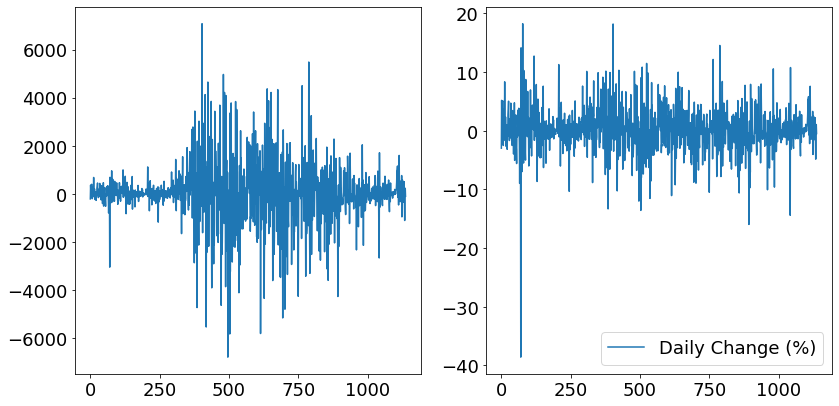

In [16]:
# Plot max daily changes in the daily data
b = daily['Bitcoin Price'].to_numpy()
diff_usd = [t - s for s, t in zip(b, b[1:])]
diff_per = [(t - s)/s*100 for s, t in zip(b, b[1:])]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(diff_usd, label='Daily Change (USD)')
ax2.plot(diff_per, label='Daily Change (%)')
plt.legend()
fig.tight_layout()

sort_diff_usd = np.sort(diff_usd)
sort_diff_per = np.sort(diff_per)

print ("Max 20 price increases in USD")
print (sort_diff_usd[-20:])
print ("Max 20 price increases in %")
print (sort_diff_per[-20:])
print ("Max 20 price decreases in USD")
print (sort_diff_usd[:20])
print ("Max 20 price decreases in %")
print (sort_diff_per[:20])

abs_diff_usd = np.sort(np.absolute(diff_usd))
abs_diff_per = np.sort(np.absolute(diff_per))
print ("Average absolute change: ", np.mean(abs_diff_usd))
print ("Standard derivation: ", np.std(abs_diff_usd))
print ("Max 20 absolute price changes in USD")
print (abs_diff_usd[-20:])
print ("Max 20 absolute price changes in %")
print (abs_diff_per[-20:])
print (np.mean(abs_diff_per[-20:]))
print (np.mean(abs_diff_per))
print (np.std(abs_diff_per))
print (np.std(abs_diff_per[-20:]))
print ((500-476)/476*100)

Max 20 price increases in USD
[2323.22871188 2327.72644932 2342.26703456 2343.54653784 2506.07669122
 2568.04784308 2570.08634596 2571.05227102 2682.20066876 2682.67185504
 2709.93101158 2764.83699034 2806.42943726 2850.80803821 2947.09083029
 2958.64672928 2961.72767845 3080.65302202 3429.17681862 5482.73925101]
Max 20 price increases in %
[ 6.34538974  6.34642504  6.41262309  6.68640161  6.72584849  6.89273156
  6.94385079  7.0162394   7.01744511  7.12757633  7.33926808  7.4516147
  7.64842986  7.87306957  8.30063416  8.74403936  9.45360765  9.56443814
 10.13901868 16.30094734]
Max 20 price decreases in USD
[-6940.33824911 -4626.75170632 -4402.96134169 -3858.16962861
 -3837.96443853 -3791.6081592  -3537.45567311 -3516.72034542
 -3464.37161688 -3436.19156264 -3393.07878618 -3235.05678528
 -3025.11528077 -2895.95280714 -2877.11115944 -2847.13246354
 -2614.97588606 -2496.55689414 -2475.45221085 -2466.19824571]
Max 20 price decreases in %
[-18.33693508 -17.40921242 -17.10503744 -10.87703

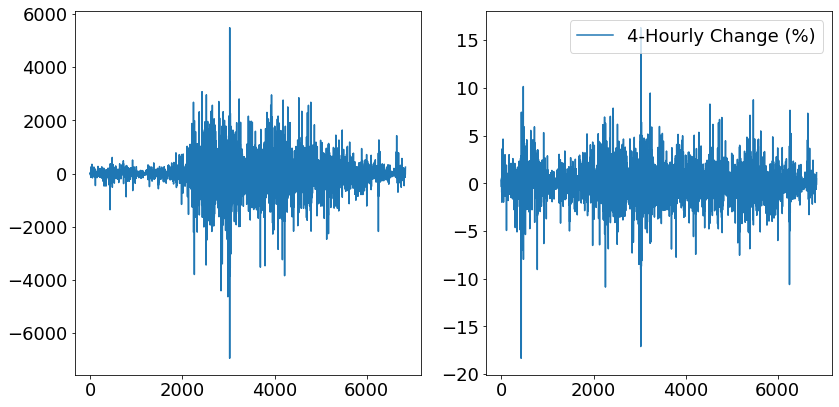

In [18]:
# Plot max 4-hourly changes in the hourly data
b = hourly['BTC PRICE- USD'].to_numpy()
diff_usd = [t - s for s, t in zip(b[::4], b[4::4])]
diff_per = [(t - s)/s*100 for s, t in zip(b[::4], b[4::4])]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(diff_usd, label='4-Hourly Change (USD)')
ax2.plot(diff_per, label='4-Hourly Change (%)')
plt.legend()
fig.tight_layout()

sort_diff_usd = np.sort(diff_usd)
sort_diff_per = np.sort(diff_per)

print ("Max 20 price increases in USD")
print (sort_diff_usd[-20:])
print ("Max 20 price increases in %")
print (sort_diff_per[-20:])
print ("Max 20 price decreases in USD")
print (sort_diff_usd[:20])
print ("Max 20 price decreases in %")
print (sort_diff_per[:20])

abs_diff_usd = np.sort(np.absolute(diff_usd))
abs_diff_per = np.sort(np.absolute(diff_per))
print ("Average absolute change: ", np.mean(abs_diff_usd))
print ("Standard derivation: ", np.std(abs_diff_usd))
print ("Max 20 absolute price changes in USD")
print (abs_diff_usd[-20:])
print ("Max 20 absolute price changes in %")
print (abs_diff_per[-20:])
print (np.mean(abs_diff_per[-20:]))
print (np.mean(abs_diff_per))
print (np.std(abs_diff_per))
print (np.std(abs_diff_per[-20:]))

# Variable Relations (daily)

Text(0, 0.5, 'Bitcoin Price (USD)')

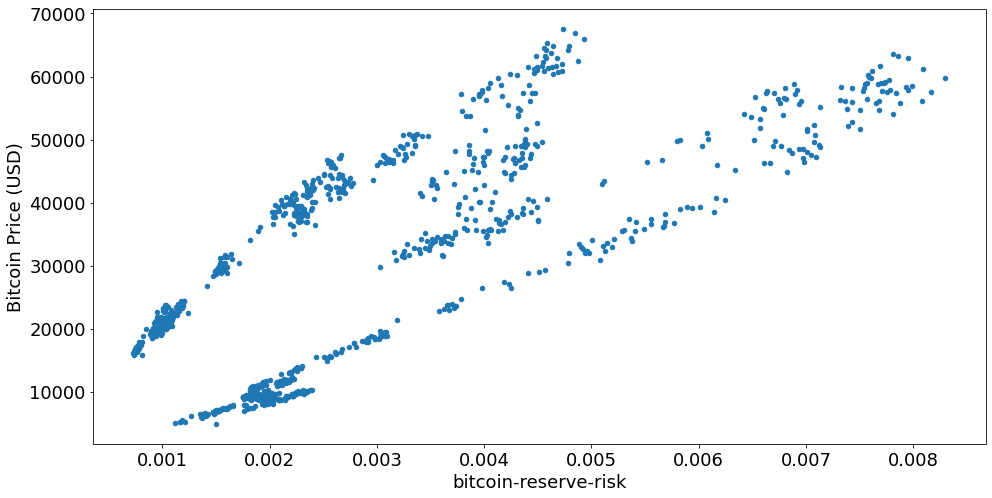

In [ ]:
# Plot variables to Bitcoin Price relations
daily.sort_values('bitcoin-reserve-risk')
btc2brr = daily.plot(x='bitcoin-reserve-risk',y='Bitcoin Price',kind='scatter')
btc2brr.set_xlabel('bitcoin-reserve-risk')
btc2brr.set_ylabel('Bitcoin Price (USD)')

Text(0, 0.5, 'Bitcoin Price (USD)')

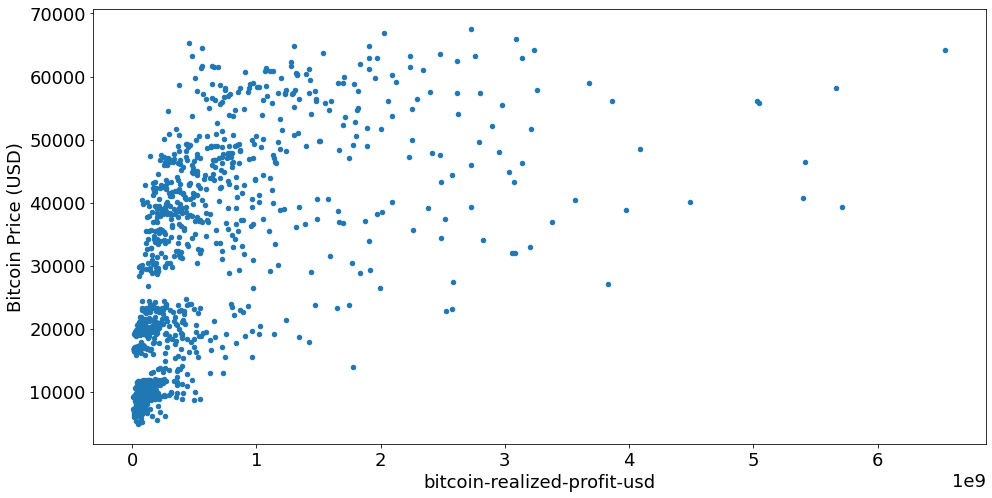

In [ ]:
# Plot variables to Bitcoin Price relations
daily.sort_values('bitcoin-realized-profit-usd')
btc2brr = daily.plot(x='bitcoin-realized-profit-usd',y='Bitcoin Price',kind='scatter')
btc2brr.set_xlabel('bitcoin-realized-profit-usd')
btc2brr.set_ylabel('Bitcoin Price (USD)')

Text(0, 0.5, 'Bitcoin Price (USD)')

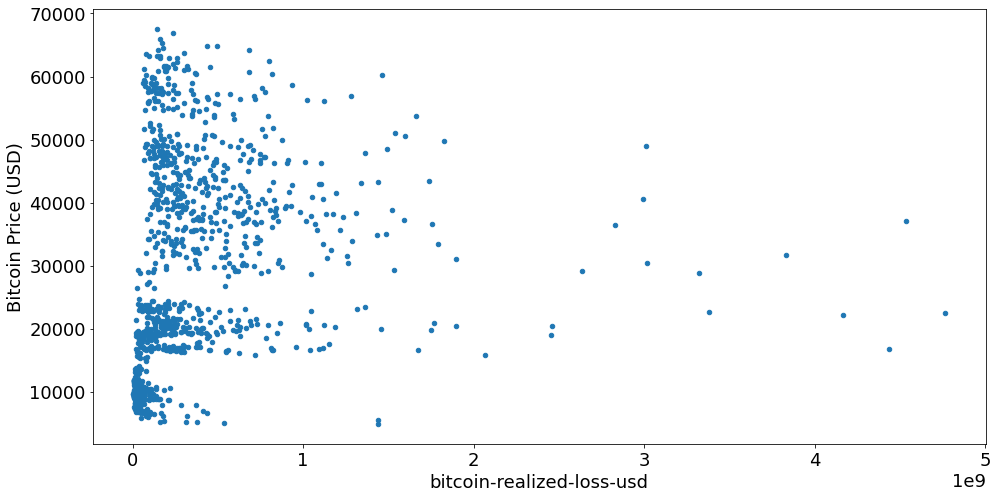

In [ ]:
# Plot variables to Bitcoin Price relations
daily.sort_values('bitcoin-realized-loss-usd')
btc2brr = daily.plot(x='bitcoin-realized-loss-usd',y='Bitcoin Price',kind='scatter')
btc2brr.set_xlabel('bitcoin-realized-loss-usd')
btc2brr.set_ylabel('Bitcoin Price (USD)')

Text(0, 0.5, 'Bitcoin Price (USD)')

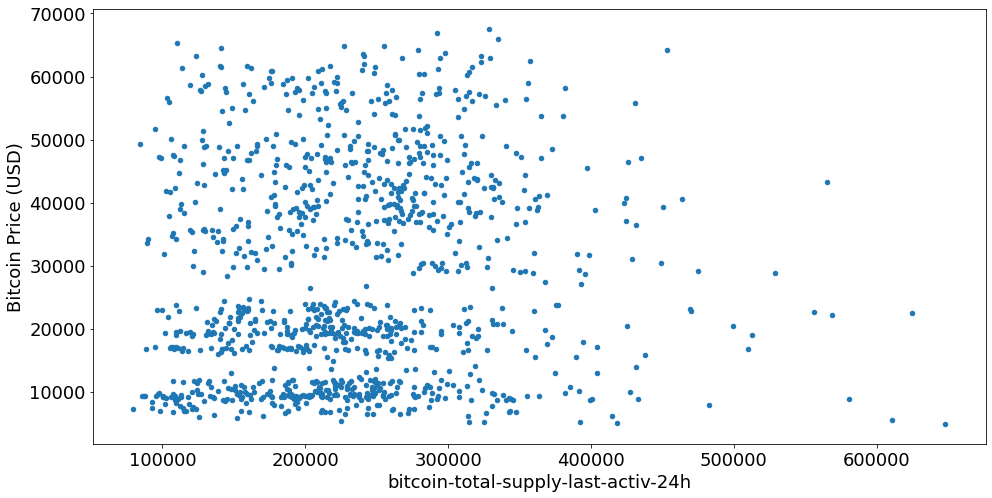

In [ ]:
# Plot variables to Bitcoin Price relations
daily.sort_values('bitcoin-total-supply-last-activ-24h')
btc2brr = daily.plot(x='bitcoin-total-supply-last-activ-24h',y='Bitcoin Price',kind='scatter')
btc2brr.set_xlabel('bitcoin-total-supply-last-activ-24h')
btc2brr.set_ylabel('Bitcoin Price (USD)')

Text(0, 0.5, 'Bitcoin Price (USD)')

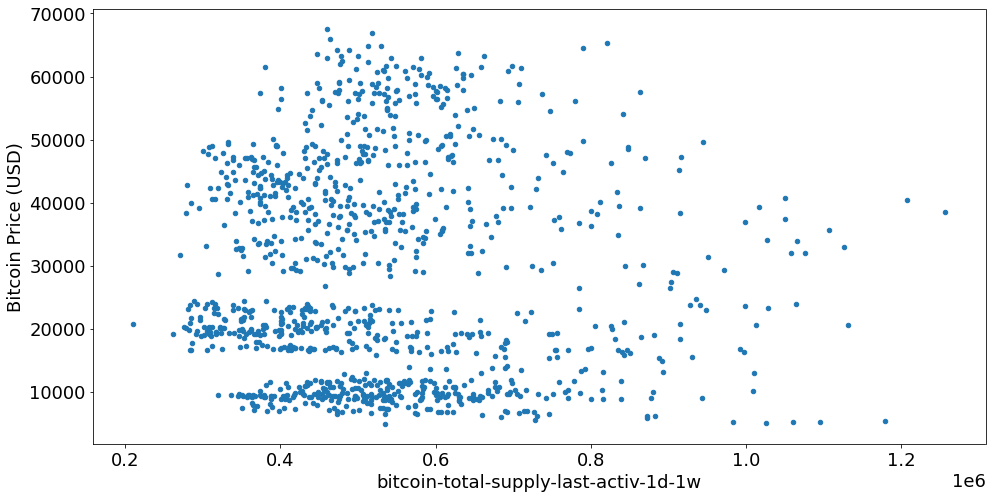

In [ ]:
# Plot variables to Bitcoin Price relations
daily.sort_values('bitcoin-total-supply-last-activ-1d-1w')
btc2brr = daily.plot(x='bitcoin-total-supply-last-activ-1d-1w',y='Bitcoin Price',kind='scatter')
btc2brr.set_xlabel('bitcoin-total-supply-last-activ-1d-1w')
btc2brr.set_ylabel('Bitcoin Price (USD)')

Text(0, 0.5, 'Bitcoin Price (USD)')

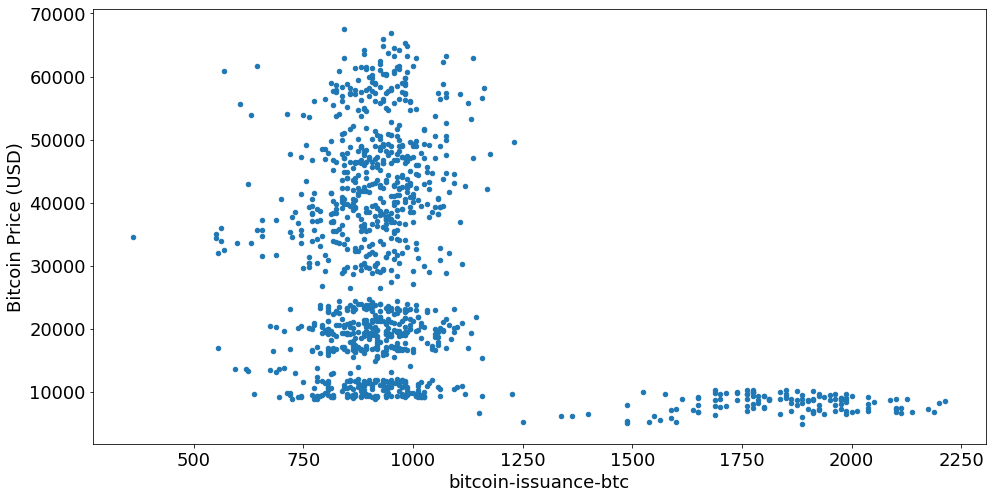

In [ ]:
# Plot variables to Bitcoin Price relations
daily.sort_values('bitcoin-issuance-btc')
btc2brr = daily.plot(x='bitcoin-issuance-btc',y='Bitcoin Price',kind='scatter')
btc2brr.set_xlabel('bitcoin-issuance-btc')
btc2brr.set_ylabel('Bitcoin Price (USD)')

Text(0, 0.5, 'Bitcoin Price (USD)')

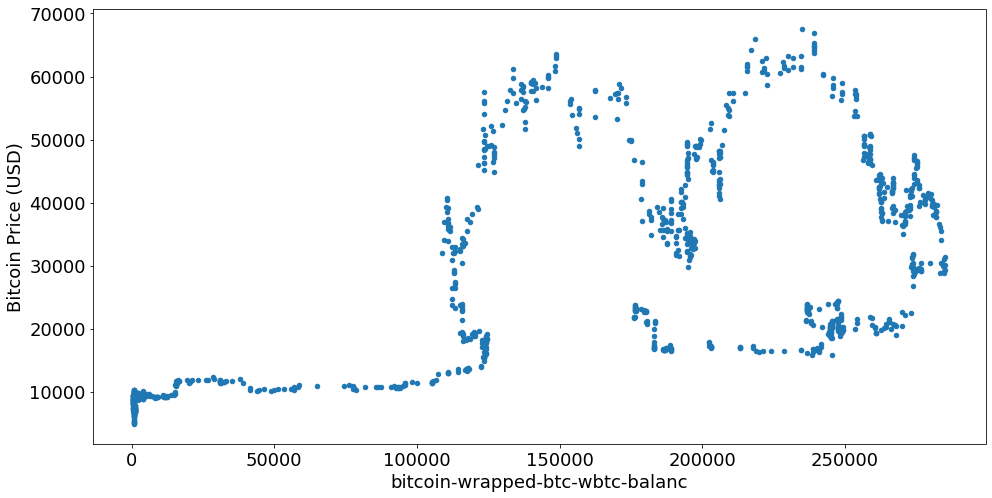

In [ ]:
# Plot variables to Bitcoin Price relations
daily.sort_values('bitcoin-wrapped-btc-wbtc-balanc')
btc2brr = daily.plot(x='bitcoin-wrapped-btc-wbtc-balanc',y='Bitcoin Price',kind='scatter')
btc2brr.set_xlabel('bitcoin-wrapped-btc-wbtc-balanc')
btc2brr.set_ylabel('Bitcoin Price (USD)')

Text(0, 0.5, 'Bitcoin Price (USD)')

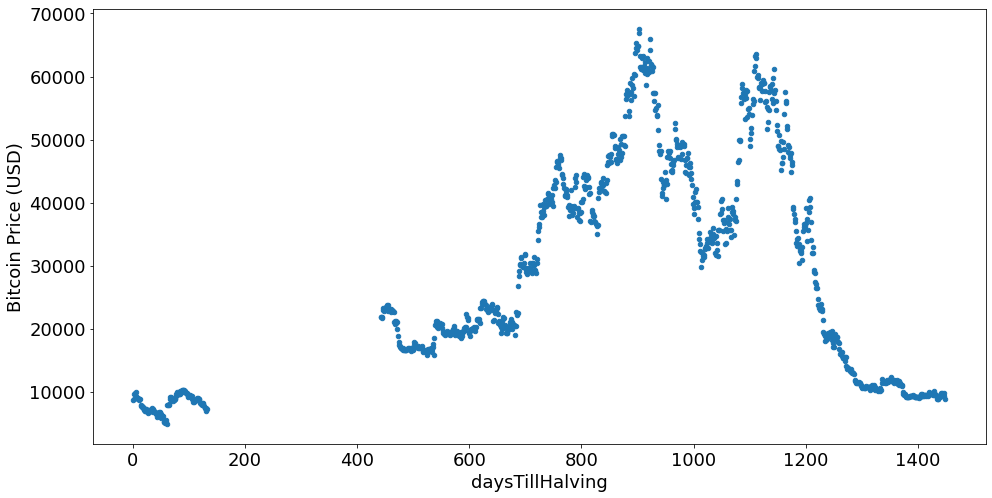

In [ ]:
# Plot variables to Bitcoin Price relations
daily.sort_values('daysTillHalving')
btc2brr = daily.plot(x='daysTillHalving',y='Bitcoin Price',kind='scatter')
btc2brr.set_xlabel('daysTillHalving')
btc2brr.set_ylabel('Bitcoin Price (USD)')

Text(0, 0.5, 'Bitcoin Price (USD)')

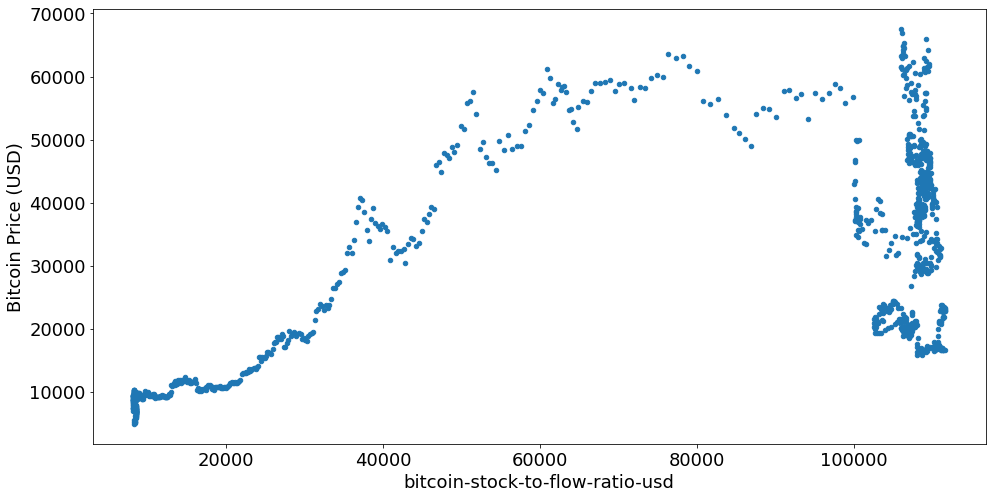

In [ ]:
# Plot variables to Bitcoin Price relations
daily.sort_values('bitcoin-stock-to-flow-ratio-usd')
btc2brr = daily.plot(x='bitcoin-stock-to-flow-ratio-usd',y='Bitcoin Price',kind='scatter')
btc2brr.set_xlabel('bitcoin-stock-to-flow-ratio-usd')
btc2brr.set_ylabel('Bitcoin Price (USD)')

# SVD Linear Regression (daily)



In [9]:
# Convert to numpy arrays
daily.sort_values('Date')
A = daily[daily.columns[2:]].to_numpy()
A = A[:-1]
# print (A)
# print (A.shape)
b = daily['Bitcoin Price'].to_numpy()
b = b[1:]
# print (b)
np.isnan(A).any()
print (np.where(A == 0)[0])
np.isnan(b).any()

[]


False

In [87]:
# Get SVD matrices (overfitted)
U, S, VT = np.linalg.svd(A,full_matrices=False)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

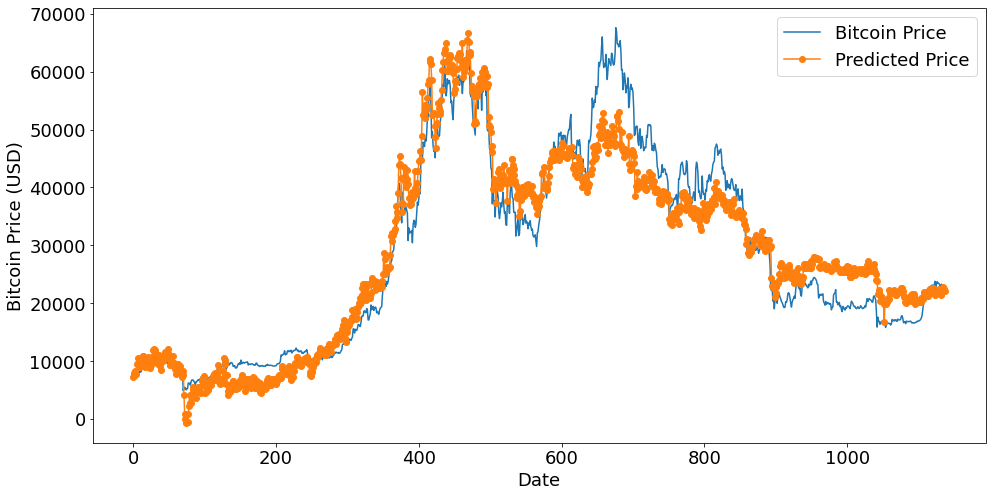

In [88]:
# Plot 
fig = plt.figure()
plt.plot(b, label='Bitcoin Price')
plt.plot(A@x, '-o', label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price (USD)')
plt.legend()


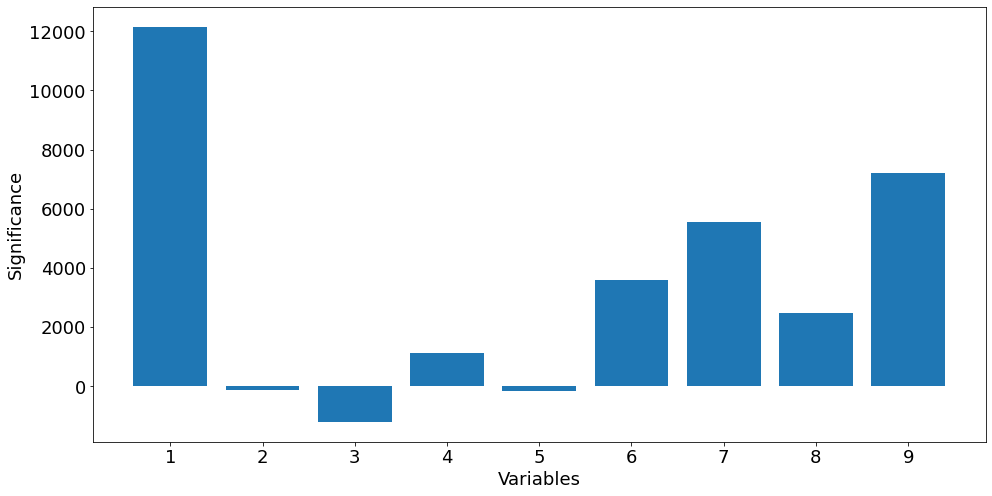

In [89]:
# Plot significance of variables
A_mean = np.mean(A,axis=0)
A_mean = A_mean.reshape(-1,1)
A2 = A - np.ones((A.shape[0],1)) @ A_mean.T
for j in range(A.shape[1]):
  A2std = np.std(A2[:,j])
  A2[:,j] = A2[:,j]/A2std

U, S, VT = np.linalg.svd(A2, full_matrices=False)
x= VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b #Y=a.X'+b
x_tick = range(1,len(x)+1)
plt.bar(x_tick,x)
plt.xlabel('Variables')
plt.ylabel('Significance')
plt.xticks(x_tick)
plt.show()

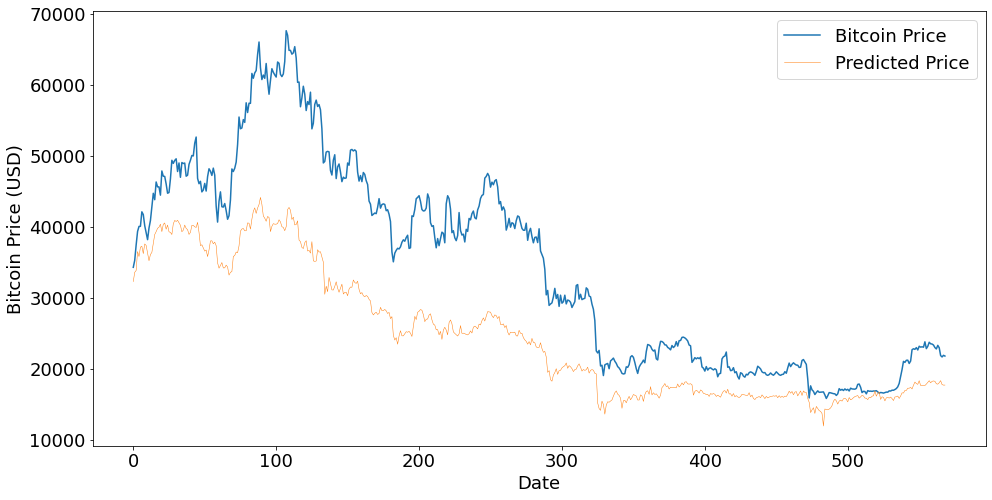

In [90]:
# Train and test data (First half/Second Half)
n = A.shape[0]//2
A_train = A[:n]
b_train = b[:n]
A_test = A[n:]
b_test = b[n:]
# Get SVD matrices from train data
U, S, VT = np.linalg.svd(A_train,full_matrices=False)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b_train
# Plot 
fig = plt.figure()
plt.plot(b[n:], label='Bitcoin Price')
x1 = A_train@x
x2 = A_test@x
Ax = np.concatenate((x1,x2))
plt.plot(Ax[n:], linewidth=0.5, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price (USD)')
plt.legend()

Train data size:  1081
Test data size:  57


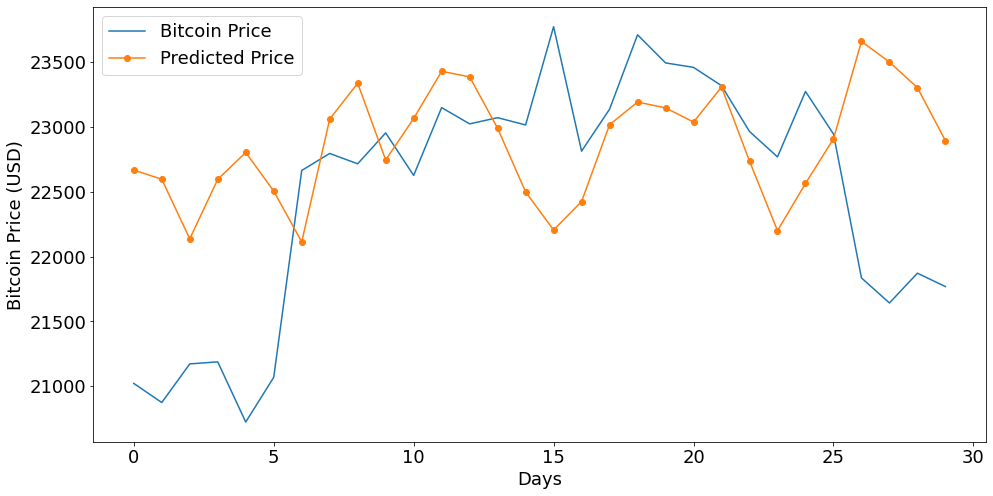

In [92]:
# Train and test data (First 95 percent/Last 5 percent)
n = int(A.shape[0]*95/100)
print ("Train data size: ", n)
print ("Test data size: ", A.shape[0]-n)
A_train = A[:n]
b_train = b[:n]
A_test = A[n:]
b_test = b[n:]
# Get SVD matrices from train data
U, S, VT = np.linalg.svd(A_train,full_matrices=False)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b_train
# Plot 
fig = plt.figure()
plt.plot(b[-30:],  label='Bitcoin Price')
x1 = A_train@x
x2 = A_test@x
Ax = np.concatenate((x1,x2))
plt.plot(Ax[-30:], '-o',  label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Bitcoin Price (USD)')
plt.legend()

# SVD Linear Regression (hourly)

In [28]:
# Convert to numpy arrays
hourly.sort_values('timestamp')
A = hourly[hourly.columns[2:]].to_numpy()
# A = A[:-1]
b = hourly['BTC PRICE- USD'].to_numpy()
# b = b[1:]
print (A.shape)
print (b.shape)
zeros_A = np.argwhere(A == 0)[:,0]
nan_A = np.argwhere(np.isnan(A))[:,0]
zeros_b = np.argwhere(b == 0)[:,0]
nan_b = np.argwhere(np.isnan(b))[0]
# print (zeros_A.shape)
# print (zeros_b.shape)
# print (nan_A.shape)
# print (nan_b.shape)
remove_list = np.unique(np.concatenate([zeros_A, zeros_b, nan_A, nan_b]))
print (remove_list)
A = np.delete(A, remove_list, axis=0)
b = np.delete(b, remove_list)
print (A.shape)
print (b.shape)

(27383, 6)
(27383,)
[   33    34   427   428  1783  1784  1840  1841  1929  1930  1938  1939
  2029  2030  2031  2032  2700  2701  3532  3533  4079  4080  4684  4685
  5518  5519  5568  5569  5698  5699  5929  5930  6349  6350  7046  7047
  7210  7211  7231  7232  9266  9267  9311  9312  9457  9458  9498  9499
  9551  9552  9631  9632  9863  9864  9896  9897 10246 10247 10351 10352
 10501 10502 11036 11037 11129 11130 11260 11261 11350 11351 11376 11377
 11379 11380 11389 11390 11443 11444 11449 11450 11614 11615 11646 11647
 11984 11985 12082 12083 12183 12184 12265 12266 12655 12656 12736 12737
 12765 12766 12774 12775 12842 12843 12912 12913 12969 12970 13033 13034
 13055 13056 13071 13072 13127 13128 13139 13140 13368 13369 14941 14942
 15101 15102 15310 15311 16301 16302 16533 16534 16549 16550 17049 17050
 17180 17181 17256 17257 17282 17283 17355 17356 17506 17507 17727 17728
 17808 17809 18202 18203 18344 18345 19693 19694 19714 19715 20357 20358
 20933 20934 20941 20942 21010 

(27156, 6) (27156,)


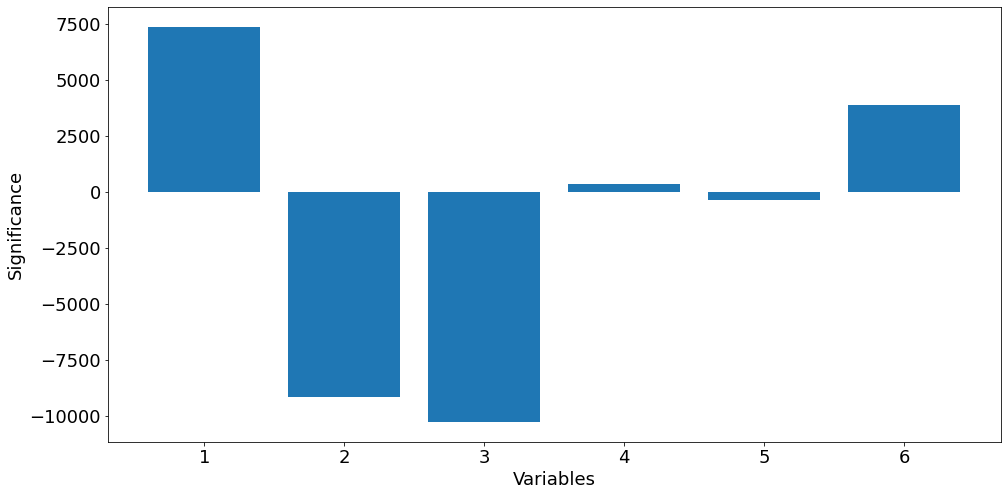

Train data size:  25798
Test data size:  1358
(27156,) (24,)


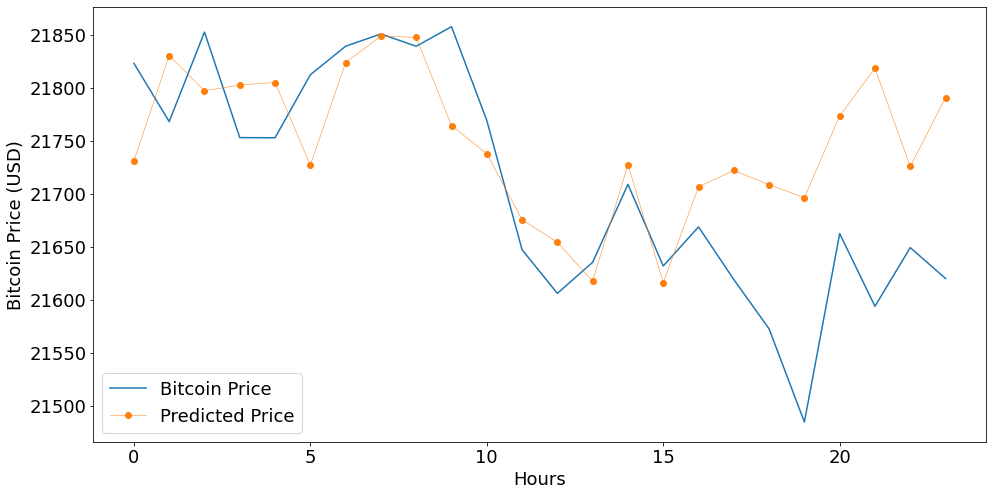

In [37]:
# Train and test data (First 95 percent/Last 5 percent)
A_mean = np.mean(A,axis=0)
A_mean = A_mean.reshape(-1,1)
A2 = A - np.ones((A.shape[0],1)) @ A_mean.T
for j in range(A.shape[1]):
  A2std = np.std(A2[:,j])
  A2[:,j] = A2[:,j]/A2std

print (A2.shape, b.shape)
U, S, VT = np.linalg.svd(A2, full_matrices=False)
x= VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b #Y=a.X'+b
x_tick = range(1,len(x)+1)
plt.bar(x_tick,x)
plt.xlabel('Variables')
plt.ylabel('Significance')
plt.xticks(x_tick)
plt.show()

A = A2

n = int(A.shape[0]*95/100)
print ("Train data size: ", n)
print ("Test data size: ", A.shape[0]-n)
A_train = A[-1*24:-6]
b_train = b[-1*24:-6]
A_test = A[-6:]
b_test = b[-6:]
# Get SVD matrices from train data
U, S, VT = np.linalg.svd(A_train,full_matrices=False)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b_train
# Plot 
fig = plt.figure()
plt.plot(b[-1*24:],  label='Bitcoin Price')
x1 = A_train@x
x2 = A_test@x
Ax = np.concatenate((x1,x2))
plt.plot(Ax, '-o', linewidth=0.5,  label='Predicted Price')
plt.xlabel('Hours')
plt.ylabel('Bitcoin Price (USD)')
plt.legend()
print (b.shape, Ax.shape)

sell here:  [21662.48352048]
buy here:  [21484.89603924 21649.31229066]
177.5874812398979


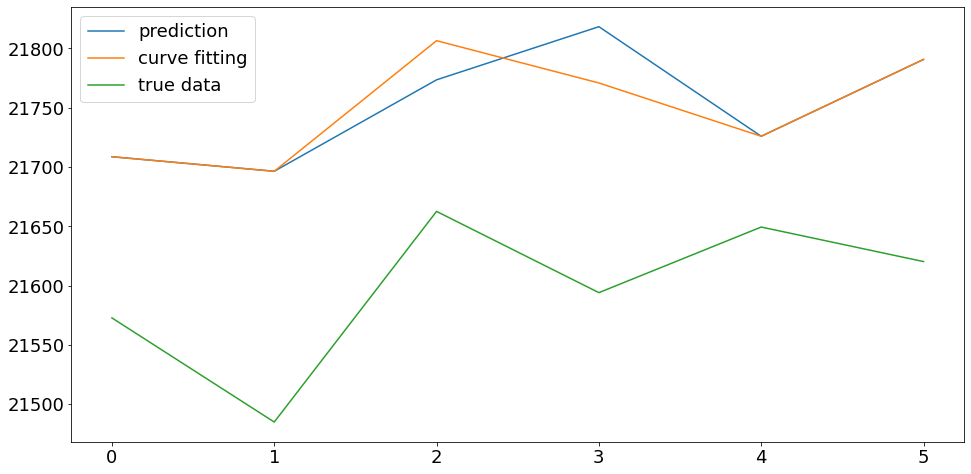

In [54]:
# Buy/Sell Algorithm
from scipy.signal import argrelextrema
from scipy.signal import savgol_filter
# Smoothen the function
c2 = savgol_filter(x2,4,3)#x2 , window_lenght, curve type cubic
fig = plt.figure()
plt.plot(x2,  label='prediction')
plt.plot(c2,  label='curve fitting')
plt.plot(b_test[-len(x2):], label='true data')
plt.legend()
# for local maxima
maxs = argrelextrema(c2, np.greater)
# for local minima
mins = argrelextrema(c2, np.less)
sell = b_test[argrelextrema(c2, np.greater)[0]]
buy = b_test[argrelextrema(c2, np.less)[0]]
print ("sell here: ", b_test[maxs])
print ("buy here: ", b_test[mins])

loss=0
profit=0
# for i in range(len(buy)):
#   t = sell[i+1]-buy[i]
#   if (t < 0):
#     loss+=abs(t)
#   else:
#     profit+=t
#   print (t)
profit += sell[0]-buy[0]
print (profit)
# profit += buy[1]-sell[0]
# print (profit/loss)

# LSTM daily 

In [115]:
# Scale data
# b = hourly['BTC PRICE- USD'].to_numpy()
b = daily['Bitcoin Price'].to_numpy()
scaler = MinMaxScaler()
scaled_btc_price = scaler.fit_transform(b.reshape(-1,1))
np.isnan(scaled_btc_price).any()
print (scaled_btc_price.shape)

(1139, 1)


In [117]:
# Create LSTM sequences
n0 = 120
def to_sequences(data, n):
    d = []
    for index in range(len(data) - n):
        d.append(data[index: index + n])
    return np.array(d)

def preprocess(data_raw, n, per_train):
    data = to_sequences(data_raw, n)
    print ("LSTM sequence shape: [Batch Size, Sequence Length, Feature Length] ", data.shape)
    num_train = int(per_train * data.shape[0])
    A_train = data[:num_train, :-1, :]
    b_train = data[:num_train, -1, :]
    A_test = data[num_train:, :-1, :]
    b_test = data[num_train:, -1, :]
    return A_train, b_train, A_test, b_test

A_train, b_train, A_test, b_test = preprocess(scaled_btc_price, n0, per_train = 0.95)  
print (A_train.shape)
print (b_train.shape)
print (A_test.shape)
print (b_test.shape)

LSTM sequence shape: [Batch Size, Sequence Length, Feature Length]  (1019, 120, 1)
(968, 119, 1)
(968, 1)
(51, 119, 1)
(51, 1)


In [118]:
# Model
DROPOUT = 0.2
WINDOW_SIZE = n0 - 1
model = keras.Sequential()
model.add(Bidirectional(CuDNNLSTM(WINDOW_SIZE, return_sequences=True),
                        input_shape=(WINDOW_SIZE, A_train.shape[-1])))
model.add(Dropout(rate=DROPOUT))
model.add(Bidirectional(CuDNNLSTM((WINDOW_SIZE * 2), return_sequences=True)))
model.add(Dropout(rate=DROPOUT))
model.add(Bidirectional(CuDNNLSTM(WINDOW_SIZE, return_sequences=False)))
model.add(Dense(units=1))
model.add(Activation('linear'))

In [119]:
# Train
model.compile(
    loss='mean_squared_error', 
    optimizer='adam'
)

In [120]:
BATCH_SIZE = 64
history = model.fit(
    A_train, 
    b_train, 
    epochs=50, 
    batch_size=BATCH_SIZE, 
    shuffle=False,
    validation_split=0.1
)

Epoch 1/50
14/14 [==============================] - 8s 135ms/step - loss: 0.0857 - val_loss: 0.0035
Epoch 2/50
14/14 [==============================] - 1s 56ms/step - loss: 0.0129 - val_loss: 7.1015e-04
Epoch 3/50
14/14 [==============================] - 1s 58ms/step - loss: 0.0125 - val_loss: 3.5563e-04
Epoch 4/50
14/14 [==============================] - 1s 58ms/step - loss: 0.0397 - val_loss: 0.0148
Epoch 5/50
14/14 [==============================] - 1s 58ms/step - loss: 0.0075 - val_loss: 0.0013
Epoch 6/50
14/14 [==============================] - 1s 60ms/step - loss: 0.0077 - val_loss: 0.0065
Epoch 7/50
14/14 [==============================] - 1s 61ms/step - loss: 0.0040 - val_loss: 0.0019
Epoch 8/50
14/14 [==============================] - 1s 60ms/step - loss: 0.0042 - val_loss: 0.0019
Epoch 9/50
14/14 [==============================] - 1s 59ms/step - loss: 0.0082 - val_loss: 0.0024
Epoch 10/50
14/14 [==============================] - 1s 57ms/step - loss: 0.0033 - val_loss: 3.7741e

In [122]:
model.evaluate(A_test, b_test)

2/2 [==============================] - 0s 34ms/step - loss: 0.0024


0.0023604314774274826

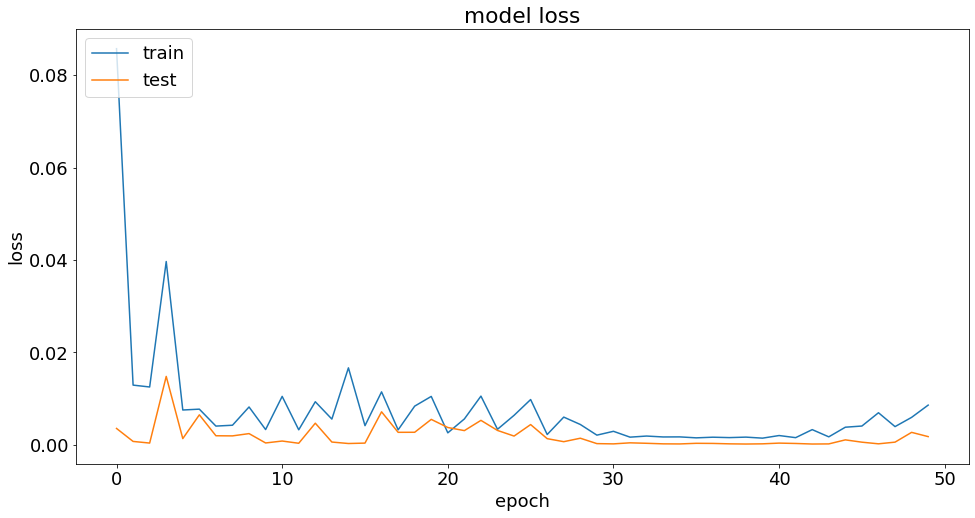

In [123]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

2/2 [==============================] - 1s 27ms/step


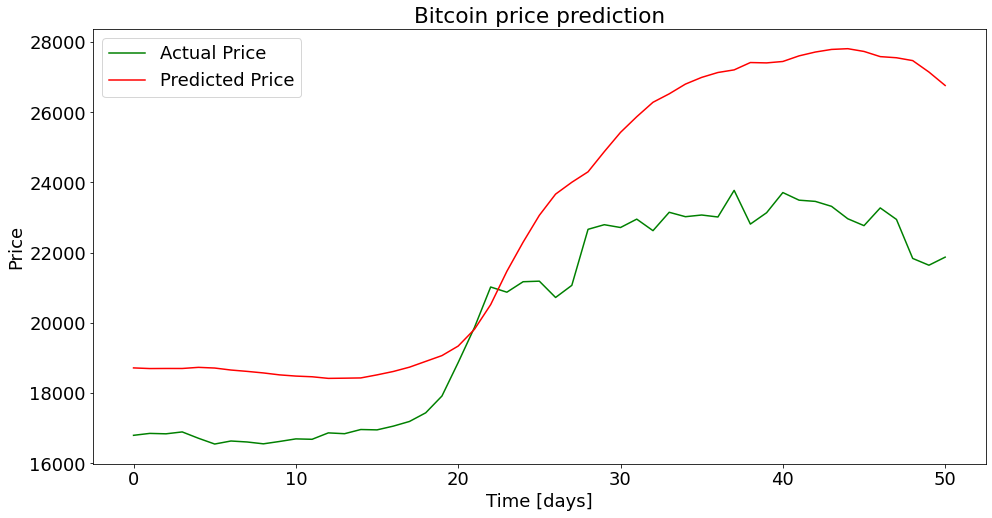

In [124]:
# Prediction
y_hat = model.predict(A_test)

y_test_inverse = scaler.inverse_transform(b_test)
y_hat_inverse = scaler.inverse_transform(y_hat)
 
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
  
plt.title('Bitcoin price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();

# LSTM hourly

In [1]:
# Scale data
b = hourly['BTC PRICE- USD'].to_numpy()
zeros_b = np.argwhere(b == 0)[:,0]
nan_b = np.argwhere(np.isnan(b))[0]
remove_list = np.unique(np.concatenate([zeros_b, nan_b]))
b = np.delete(b, remove_list)
scaler = MinMaxScaler()
scaled_btc_price = scaler.fit_transform(b.reshape(-1,1))
print (np.isnan(scaled_btc_price).any())
print (scaled_btc_price.shape)

NameError: ignored

In [130]:
# Create LSTM sequences
n0 = 24
def to_sequences(data, n):
    d = []
    for index in range(len(data) - n):
        d.append(data[index: index + n])
    return np.array(d)

def preprocess(data_raw, n, per_train):
    data = to_sequences(data_raw, n)
    print ("LSTM sequence shape: [Batch Size, Sequence Length, Feature Length] ", data.shape)
    num_train = int(per_train * data.shape[0])
    A_train = data[:num_train, :-1, :]
    b_train = data[:num_train, -1, :]
    A_test = data[num_train:, :-1, :]
    b_test = data[num_train:, -1, :]
    return A_train, b_train, A_test, b_test

scaled_btc_price = scaled_btc_price[-30*24:]
A_train, b_train, A_test, b_test = preprocess(scaled_btc_price, n0, per_train = 0.95)  
print (A_train.shape)
print (b_train.shape)
print (A_test.shape)
print (b_test.shape)

LSTM sequence shape: [Batch Size, Sequence Length, Feature Length]  (696, 24, 1)
(661, 23, 1)
(661, 1)
(35, 23, 1)
(35, 1)


In [132]:
# Model
DROPOUT = 0.2
WINDOW_SIZE = n0 - 1
model = keras.Sequential()
model.add(Bidirectional(CuDNNLSTM(WINDOW_SIZE, return_sequences=True),
                        input_shape=(WINDOW_SIZE, A_train.shape[-1])))
model.add(Dropout(rate=DROPOUT))
model.add(Bidirectional(CuDNNLSTM((WINDOW_SIZE * 2), return_sequences=True)))
model.add(Dropout(rate=DROPOUT))
model.add(Bidirectional(CuDNNLSTM(WINDOW_SIZE, return_sequences=False)))
model.add(Dense(units=1))
model.add(Activation('linear'))

In [133]:
# Train
model.compile(
    loss='mean_squared_error', 
    optimizer='adam'
)

In [134]:
BATCH_SIZE = 64
history = model.fit(
    A_train, 
    b_train, 
    epochs=50, 
    batch_size=BATCH_SIZE, 
    shuffle=False,
    validation_split=0.1
)

Epoch 1/50
10/10 [==============================] - 7s 101ms/step - loss: 0.0189 - val_loss: 3.2220e-05
Epoch 2/50
10/10 [==============================] - 0s 19ms/step - loss: 0.0034 - val_loss: 5.2759e-06
Epoch 3/50
10/10 [==============================] - 0s 16ms/step - loss: 5.9519e-04 - val_loss: 5.3561e-04
Epoch 4/50
10/10 [==============================] - 0s 17ms/step - loss: 5.8489e-04 - val_loss: 2.3142e-06
Epoch 5/50
10/10 [==============================] - 0s 16ms/step - loss: 1.0222e-04 - val_loss: 4.4114e-04
Epoch 6/50
10/10 [==============================] - 0s 18ms/step - loss: 2.5574e-04 - val_loss: 5.2741e-05
Epoch 7/50
10/10 [==============================] - 0s 17ms/step - loss: 1.0267e-04 - val_loss: 2.6476e-04
Epoch 8/50
10/10 [==============================] - 0s 17ms/step - loss: 1.7351e-04 - val_loss: 1.3595e-04
Epoch 9/50
10/10 [==============================] - 0s 18ms/step - loss: 1.3271e-04 - val_loss: 1.9812e-04
Epoch 10/50
10/10 [=========================

In [135]:
model.evaluate(A_test, b_test)

2/2 [==============================] - 0s 10ms/step - loss: 3.4267e-04


0.0003426706825848669

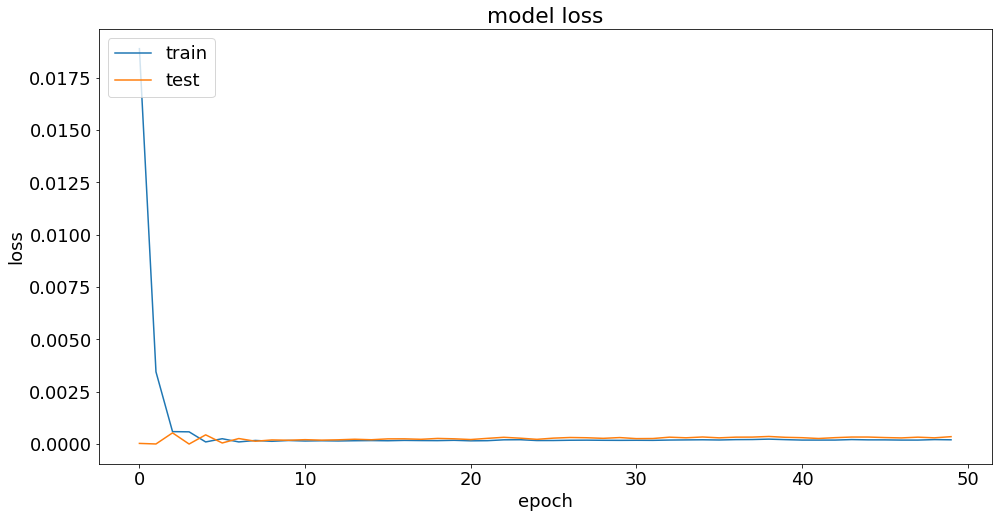

In [136]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

2/2 [==============================] - 1s 7ms/step


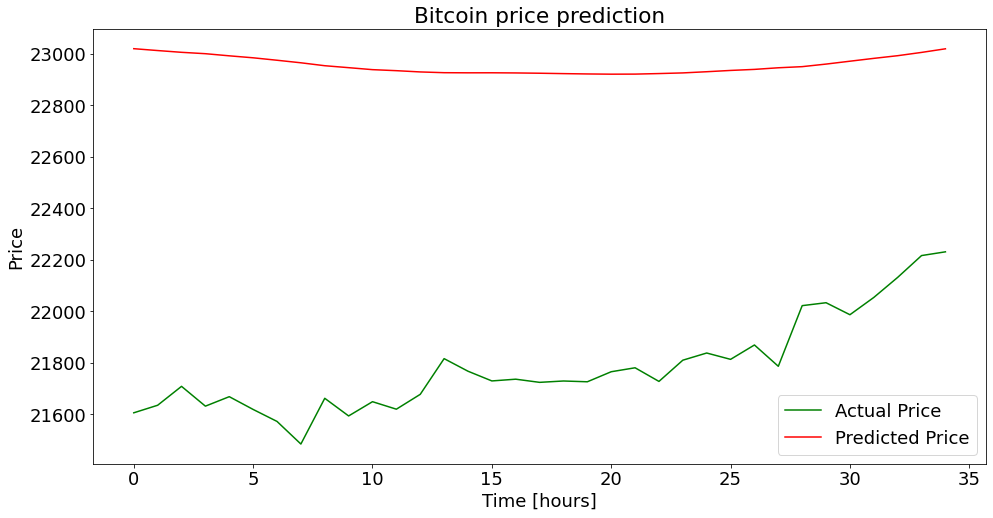

In [137]:
# Prediction
y_hat = model.predict(A_test)

y_test_inverse = scaler.inverse_transform(b_test)
y_hat_inverse = scaler.inverse_transform(y_hat)
 
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
  
plt.title('Bitcoin price prediction')
plt.xlabel('Time [hours]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();

# Divide Data

In [ ]:
# Divide data into 9+1 parts (120 days for first 9, and 59 days the last)
n = 120
for i in range(9):
  # Set train and test data for parts
  A_part = A[n*i:n*(i+1)]
  b_part = b[n*i:n*(i+1)]
  A_part_train = A_part[:60]
  b_part_train = b_part[:60]
  A_part_test = A_part[60:]
  b_part_test = b_part[60:]
  # Get SVD for parts
  U, S, VT = np.linalg.svd(A_part_train,full_matrices=False)
  x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b_part_train
  # Plot

# Trade Suggestion

(array([ 4, 10, 16, 27, 29, 38, 45, 53]),)
(array([ 6, 15, 19, 28, 30, 41, 49]),)
[16829.60538346 16547.5668696  16682.71588531 21020.72155064
 21171.40010863 23149.55139405 23711.52762911 21835.07047435]
[16850.4640968  16693.9300091  16961.05741131 20873.35288034
 21187.13555809 23015.46167989 22965.07223064]
-302.89722720859936
-11.214123788002325
4059.6641393282007
298.04722829059756
1962.4158359643006
696.0659492246014
-1130.0017562862995
4.8584789636101755


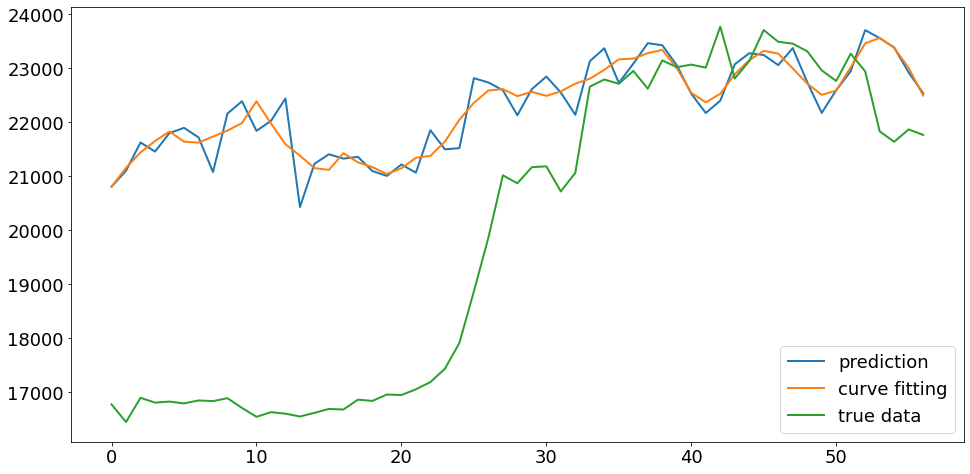

In [ ]:
# Buy/Sell Algorithm
from scipy.signal import argrelextrema
from scipy.signal import savgol_filter
# Smoothen the function
c2 = savgol_filter(x2,7,3)#x2 , window_lenght, curve type cubic
fig = plt.figure()
plt.plot(x2, LineWidth=2, label='prediction')
plt.plot(c2, LineWidth=2, label='curve fitting')
plt.plot(b[-len(x2):],LineWidth=2, label='true data')
plt.legend()
# for local maxima
print (argrelextrema(c2, np.greater))
# for local minima
print (argrelextrema(c2, np.less))
sell = b[argrelextrema(c2, np.greater)[0]+len(A_train)]
buy = b[argrelextrema(c2, np.less)[0]+len(A_train)]
print (sell)
print (buy)
loss=0
profit=0
for i in range(len(buy)):
  t = sell[i+1]-buy[i]
  if (t < 0):
    loss+=abs(t)
  else:
    profit+=t
  print (t)
print (profit/loss)

Recommending Cryptocurrency Trading Points with Deep Reinforcement Learning Approach
by Sattarov et. al. 2020

## Purpose 
Using DRL, observe historical data and take action on real-time prices, then give reasonable trading suggesstions.
## Five most common active trading suggesstions
* **The Double Crossover**: Check the long (LMA) and short-term (SMA) averages for deciding long-term bull or bear market.
  - Example LMA is 60 days, SMA is 15 days.
  - Golden cross: Actual price crosses over SMA, and SMA crosses over LMA.
  - Death cross: Actuall price crosses under SMA, and SMA crosses under LMA.
  - Golder cross indicates bull market. Good Buy point.
  - Death cross indicates bear market. Good Sell point.
* **Day trading**: Doing all purchase and sells in a day, and leaving the market before it closes with intention of avoiding the losses from the unexpected changes till the next market day open. Buy/sell decisions are on based market news, so not really suitable for DRL.
* **Swing trading**: Capture a chunk of the expected price move, trade and make profit, and then move on to the next opportunity.
* **Scalping**: Buying at the Bid price and selling at the Ask price to get the difference between supply and demand. Not really recommended in the article.
* **Position trading**: Keeping the position long-term and not worrying about short-term loss or gain. 
  - No buy/sell suggesstion system.
  - Resistance is where the price usually stops increasing.
  - Support is where the price usually stops decreasing.

## Proposed DRL module
* Aim at short-term profits.
* Used Python, TensorFlow and Keras for API.
* Algorithm Components: 
  - Environments (S): What every trader hold. No way of knowing.
  - Actions (A): Buy or Sell or Hold
  - Reward function (R: SxR-> R): Subtract selling from purchasing price (r).
  - Policy function (pi): Buy/Sell/Hold probabilities. 
  - Ultimate goal is to maximize short-term accumulated returns.  \sum_{k=0}^\infty \gamma^k r_{k}
  - \gamma is discount factor (present value is preferred to equivalent future value)
* DRL steps
  - Agent: Who takes actions.
  - Action: Steps to achieve rewards.
  - Rewards: Measure of success.
  - Environment: The world agent perfoms actions.
  - State: Immediate of present situation of the agent.
  - Neural Network: Brain of agent. 
* Architecture of DRL
  - Environment: (Stock Market) Responsible for accounting for stock assets, money management, model monitoring, buying, holding, selling stocks, and calculating the reward for actions taken.  
  - Agent: (Trader) runs every day, observes the environment, to choose an action with the policies learned during the training.
  - Agent gets the initial state (s_0) from the market, then choose an action randomly (a_0), then get the new state (s_1). Repeat while making the actions based on rewards.
* Deep Neural Model
  - Four multilayer model.
  - 64 -> 32 -> 8 -> 3 (buy/sell/hold)
  - Reclified Liner Unit (ReLU) function for first 3 and a linear function of the last.
  - Mean Square Error function is used.
  - Results from all 4 is used to determine confidence level.
  - Reward is calculated when sell occurs.
  - Negative reward gives agent a punishment.
  - More than 20 sequential hold or buy gives a punishment.
  - Buy resets hold counter.
  - Sell resets buy and hold counter. 


